# Описание

Решение задачи регрессии. В качестве датасета берутся данные о недвижимости Калифорнии из библиотеки sklearn.datasets.

Целевая переменная – `MedHouseVal`. На полученных данных построить модель регрессии и дерево решений.

## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Этап 1: Получение и загрузка данных

In [2]:
# Загружаем данные
california_data = fetch_california_housing()

# Преобразуем данные в DataFrame для удобства анализа
df = pd.DataFrame(data=california_data.data, columns=california_data.feature_names)
df["MedHouseVal"] = california_data.target

## Этап 2: Первичный анализ данных

### Проверка на пропуски

In [3]:
# Проверка на пропуски
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Пропуски отсутствуют

### Нормализация признаков

In [4]:
# Нормализуем один из признаков, например, 'Population'
scaler = StandardScaler()
df["Population"] = scaler.fit_transform(df[["Population"]])

## Этап 3: Разделение выборки

In [5]:
# Разделяем данные на обучающую и тестовую выборки
X = df.drop("MedHouseVal", axis=1)  # Признаки
y = df["MedHouseVal"]  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Этап 4: Обучение модели регрессии

In [6]:
# Создаем и обучаем модель линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Этап 5: Оценка модели регрессии

In [7]:
# Предсказание для тестового множества
y_pred_lin = lin_reg.predict(X_test)

# Оценка точности предсказания
accuracy_lin = lin_reg.score(X_test, y_test)
print(f"Точность линейной регрессии: {accuracy_lin:.2f}")

Точность линейной регрессии: 0.58


## Этап 6: Обучение дерева решений

In [8]:
# Создание модели дерева решений с ограничением глубины
decision_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)
accuracy_tree = decision_tree.score(X_test, y_test)
print(f"Точность дерева решений: {accuracy_tree:.2f}")

Точность дерева решений: 0.51


### Визуализация дерева решений

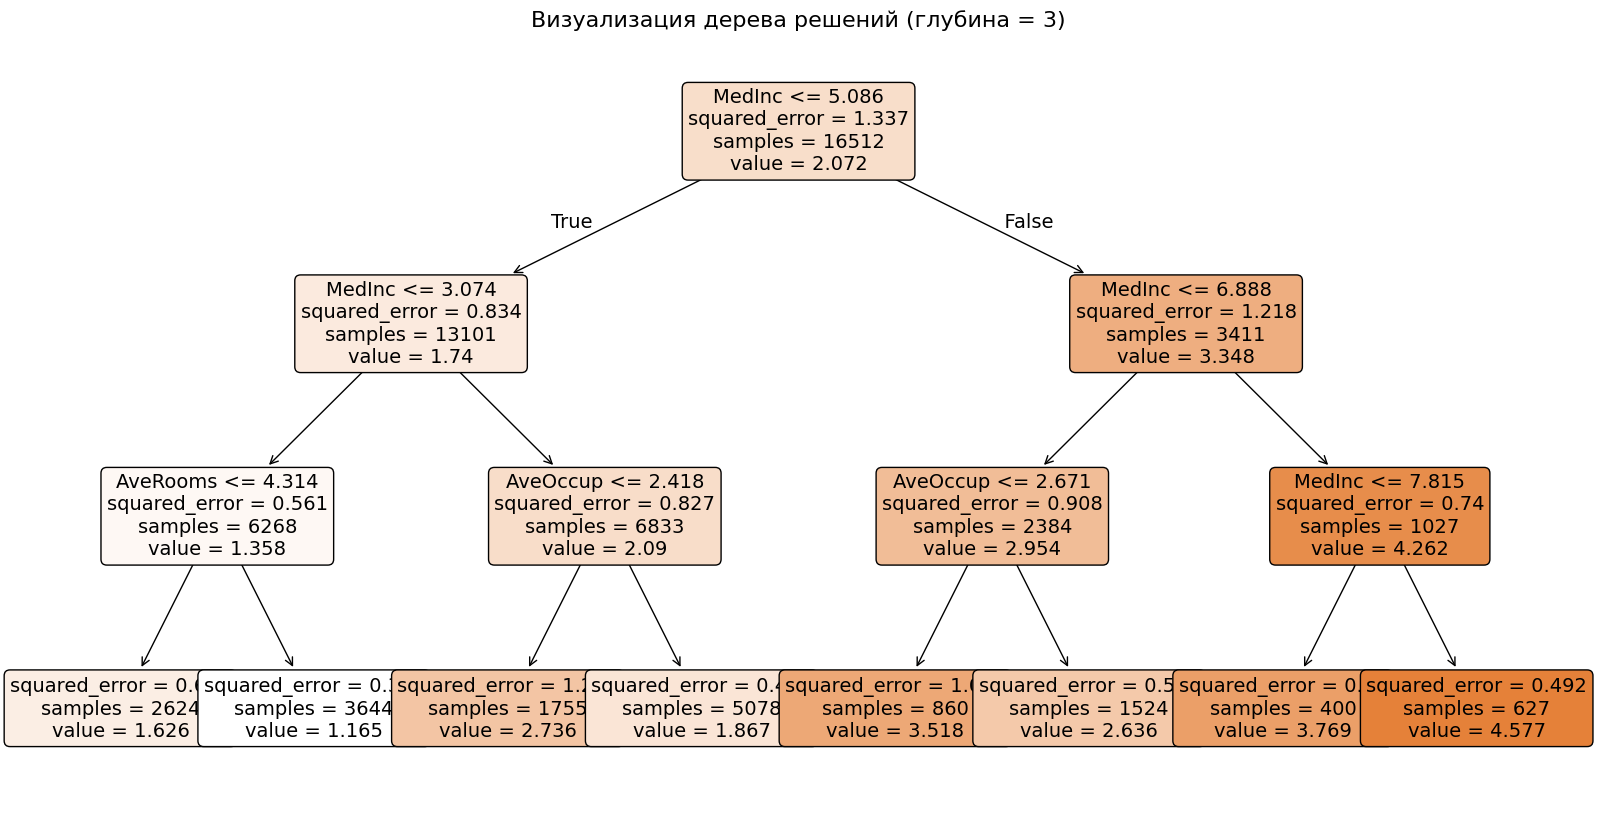

In [9]:
# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=14
)
plt.title("Визуализация дерева решений (глубина = 3)", fontsize=16)
plt.show()

## Этап 7: Оптимизация глубины дерева

In [10]:
# Поиск лучшей глубины дерева
param_grid = {"max_depth": [3, 5, 7, 9, 11], "min_samples_split": [2, 5, 10]}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_tree = grid_search.best_estimator_
accuracy_best_tree = best_tree.score(X_test, y_test)
print(f"Оптимизированная точность дерева решений: {accuracy_best_tree:.2f}")

Оптимизированная точность дерева решений: 0.69


## Вывод

In [11]:
print(
    f"Сравнение точностей:\nЛинейная регрессия: {accuracy_lin:.2f}\nДерево решений: {accuracy_tree:.2f}\nОптимизированное дерево: {accuracy_best_tree:.2f}"
)

Сравнение точностей:
Линейная регрессия: 0.58
Дерево решений: 0.51
Оптимизированное дерево: 0.69


В данной работе были обучены две модели: линейная регрессия и дерево решений. Линейная регрессия показала себя стабильной на линейных данных, в то время как дерево решений может быть более гибким, но требует внимательной настройки, чтобы избежать переобучения.